In [2]:
import numpy as np
import matplotlib.pyplot as plt

def draw_clusters(X, clusters, centroids):
    #颜色列表
    c = ["b", "g", "r", "c", "m", "y"]
    #聚类数量
    d = np.max(clusters)
    #画出每种聚类
    for i in range(d+1):
        plt.scatter(X[clusters==i][:, 0], X[clusters==i][:, 1], c=c[i], s=1)
    
    #画出中心
    plt.scatter(centroids[:, 0], centroids[:, 1], c="black")
    plt.show()

def k_means(X, k, plot=0):
    #数据维度
    n, d = X.shape
    #聚类标签
    clusters = np.zeros(n, dtype=int)
    #初始中心点
    index = np.random.randint(0, n, k)
    #centroids = np.random.rand(k, d)
    centroids = X[index]
    #记录上一轮迭代的聚类中心
    centroids_pre = np.copy(centroids)
    #设置阈值
    D = 1e-5
    
    while True:
        #计算距离矩阵
        d1 = np.sum(X ** 2, axis=1).reshape(-1, 1)
        d2 = np.sum(centroids ** 2, axis=1).reshape(1, -1)
        dist = d1 + d2 - 2 * X.dot(centroids.T)
        
        #STEP1:找到最近的中心
        clusters = np.argmin(dist, axis=1)
        #STEP2:重新计算中心
        for i in range(k):
            centroids[i] = np.mean(X[clusters==i], axis=0)
            
        #计算误差
        delta = np.linalg.norm(centroids - centroids_pre)
        
        #判断是否作图
        if plot:
            draw_clusters(X, clusters, centroids)
        
        if delta < D:
            break
        
        centroids_pre = np.copy(centroids)
        
X = np.genfromtxt("X.dat")

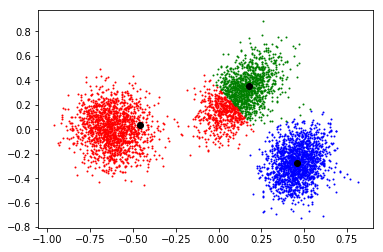

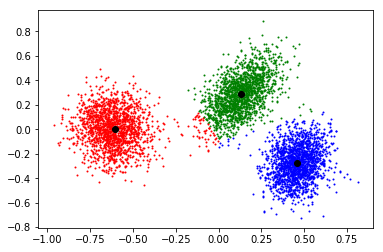

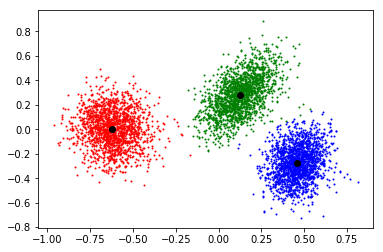

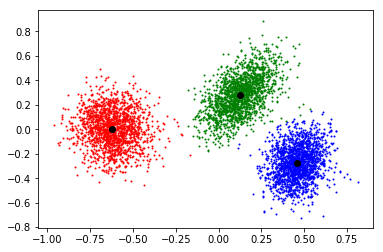

In [4]:
k_means(X, 3, plot=1)